# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

- Цель: Определить параметры, влияющие на стоимость объектов недвижимости.
- План работы:
1. Изучить общую информацию.
2. Провести предобработку данных:
  1. Устранить пропуски в значениях;
  2. Удалить дубликаты (если они есть).
3. Внести в таблицу новые данные, которые помогут в исследовании.
4. Провести исследовательский анализ данных. Определить зависимость параметров от общей стоимости.
5. Подготовить отчет.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

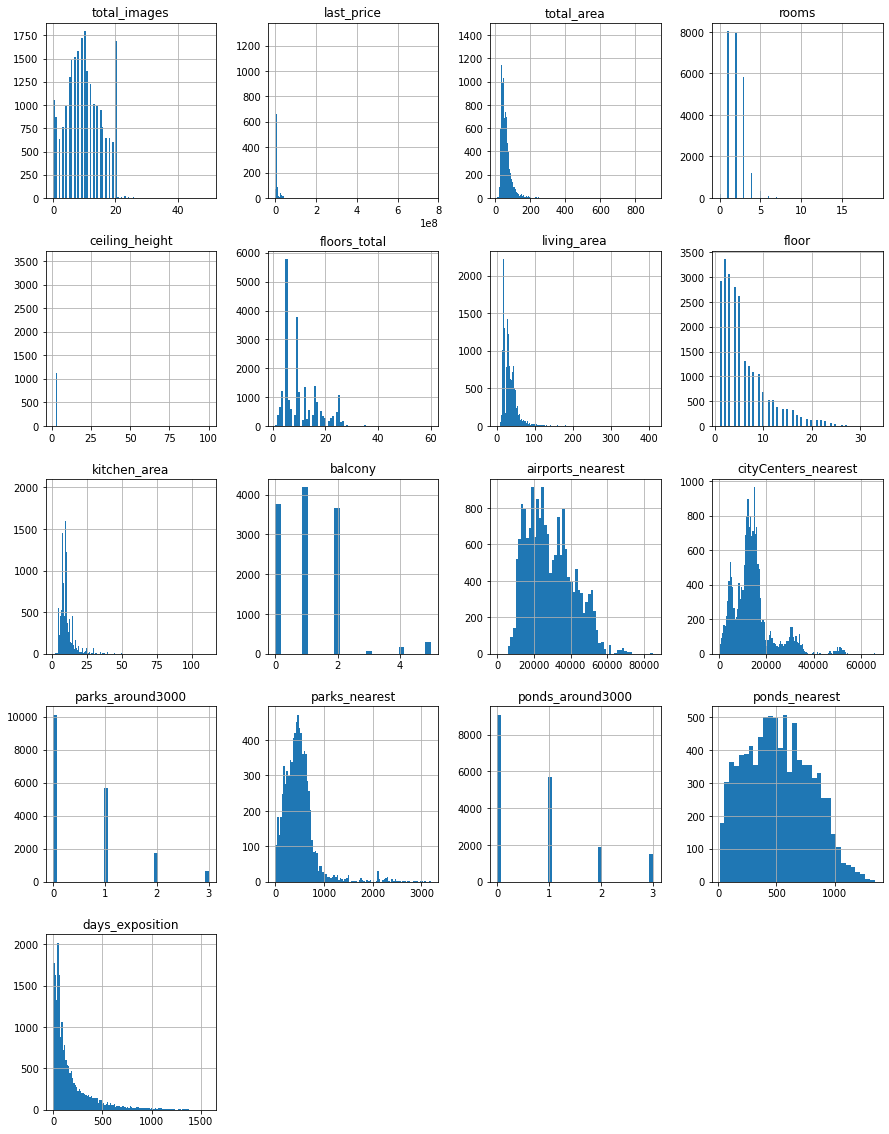

In [3]:
data.hist(bins='auto', figsize=(15, 20));

**Вывод по 1 части: Был загружен предлагаемый датасет, посмотрели несколько строк для общего понимания, просмотрена информация об этом датасете, построены гистограммы по каждому столбцу для первичной оценки данных.**

### Предобработка данных

**Определяем количество пропусков в столбцах**

In [4]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Заменим пропуски в столбце `balcony` на 0, т.к если их не указали, возможно балконов и нет вовсе. Преобразуем тип данных.**

In [5]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

**Также поступим со столбцом `is_apartment`, скорее всего пропуск означает, что помещение не является апартаментами**

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Удалим строки, где есть пропуски в названии населенного пункта. Таких строк всего 49, поэтому на исследование не сильно повлияет удаление таких строк.**

In [7]:
data = data.dropna(subset=['locality_name'])

**Поменяем типы данных в столбце `first_day_exposition`, для дальнейшей работы уже в формате datetime.**

In [8]:
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [9]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15586
ponds_nearest           14565
ceiling_height           9160
airports_nearest         5534
cityCenters_nearest      5511
ponds_around3000         5510
parks_around3000         5510
days_exposition          3180
kitchen_area             2269
living_area              1898
floors_total               85
balcony                     0
locality_name               0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Остались столбцы с пропусками 2 типов:**
1. Пропуски, сделанные человеком (`ceiling_height`, `floors_total`, `living_area`, `kitchen_area`) по причине невнимательности или просто из-за отсутствия информации.
2. Пропуски программные. Появились, скорее всего, из-за сбоя в программе (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`).

**Поиск явных дубликатов:**

In [10]:
data.duplicated().sum()

0

**Явных дубликатов нет, поищем неявные.**

In [11]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [12]:
duplicates = ['посёлок', 'поселок станции', 'посёлок станции', 'посёлок при железнодорожной станции', 'коттеджный посёлок', 'поселок при железнодорожной станции', 'коттеджный поселок']
duplicates2 = ['поселок городского типа', 'городской поселок']
for i in duplicates:
    data['locality_name'] = data['locality_name'].str.replace(i, 'поселок')
for i in duplicates2:
    data['locality_name'] = data['locality_name'].str.replace(i, 'пгт')

**Вывод по 2 части: Предобработка данных включает в себя устранение пропусков в значениях, где это возможно, удаление дубликатов. Пропуски какие смог, заполнил, дубликаты удалены.**

### Посчитайте и добавьте в таблицу новые столбцы

In [13]:
data['price_one_meter'] = (data['last_price'] / data['total_area']).round(2)
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['type_floor'] = (
    data['floor']
    .where(data['floor'] > 1, 'первый')
    .where(data['floor'] != data['floors_total'], 'последний')
    .where((data['floor'] == 1) | (data['floor'] == data['floors_total']), 'другой')
)
data['distance_to_center'] = ((data['cityCenters_nearest']) / 1000).round()
data.head(10)
#data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday,month,year,type_floor,distance_to_center
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


**Вывод по 3 части: В таблицу добавлены столбцы, необходимые для дальнейшего проведения анализа данных**

### Проведите исследовательский анализ данных

Среднее значение: 60.3 , Медиана: 52.0


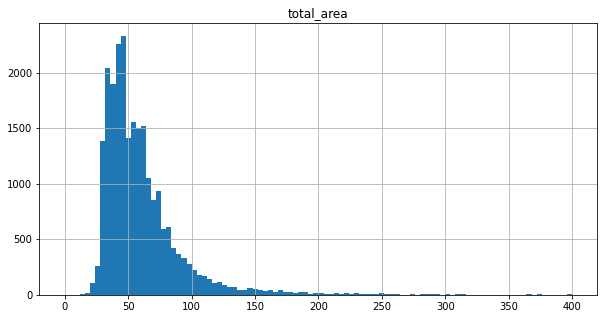

In [14]:
data.hist('total_area', bins=100, grid=True, range=(0, 400), figsize=(10, 5))
print('Среднее значение:', round(data['total_area'].mean(), 1), ',', 'Медиана:', data['total_area'].median())

**Видно, что большая часть квартир имею общую площадь от 30 до 70 кв.м. Выглядит правдоподобно. Медиана и среднее значительно отличаются. Выбивающиеся значения влияют на среднее. Позже избавимся от них.**

Среднее значение: 34.4 , Медиана: 30.0


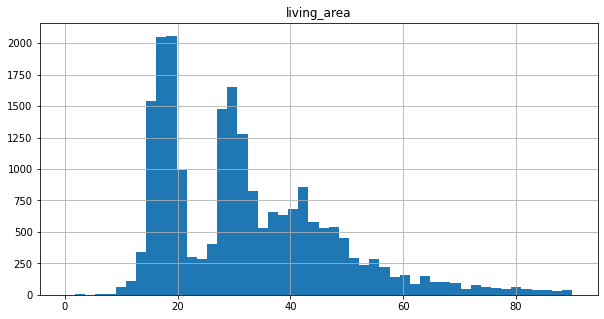

In [15]:
data.hist('living_area', bins=50, range=(0, 90), figsize=(10, 5))
print('Среднее значение:', round(data['living_area'].mean(), 1), ',', 'Медиана:', data['living_area'].median())

**Большая часть продаваемых квартир имеет жилую площадь примерно от 15 до 40 кв.м. Обычные 1-, 2-, 3-х комнатные квартиры. Среднее значение и медиана незначительно отличаются и находятся в районе 30-35 кв.м.**

Среднее значение: 10.6 , Медиана: 9.1


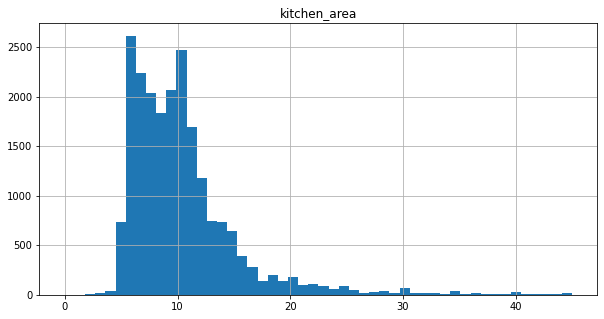

In [16]:
data.hist('kitchen_area', bins=50, range=(0, 45), figsize=(10, 5))
print('Среднее значение:', round(data['kitchen_area'].mean(), 1), ',', 'Медиана:', data['kitchen_area'].median())

**Медианное и среднее значения площади кухонь в районе 10 кв.м. График тяготеет к нормальному типу распределения, но у нас 2 пиковых значения. Связано это с проектами домов: в "хрущевках" кухни маленькие, в более современных строениях площадь кухни увеличилась.**

Среднее значение: 6541126.9 , Медиана: 4650000.0


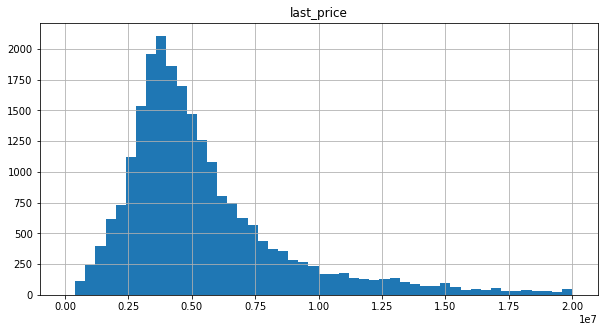

In [17]:
data.hist('last_price', bins=50, range=(0, 20000000), figsize=(10, 5))
print('Среднее значение:', round(data['last_price'].mean(), 1), ',', 'Медиана:', data['last_price'].median())

**Квартиры стоимостю 2.5 млн. руб - 6 млн. руб самые распространенные. Из-за наличия выбивающихся значений, среднее значение больше медианного почти на 50%. График тяготеет к нормальному типу распределения.**

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

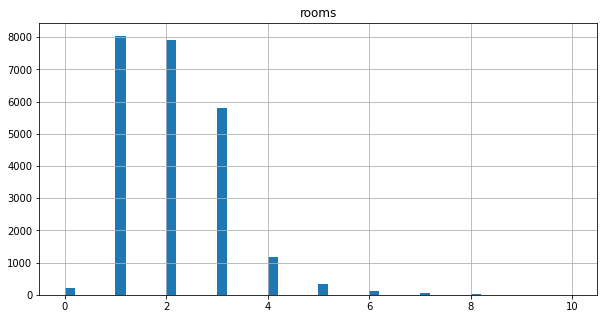

In [18]:
data.hist('rooms', bins=50, range=(0, 10), figsize=(10, 5))

**Самыми распространенными всегды были "однушки" и "двушки". 0 комнат - это, скорее всего, студии и свободные планировки.**

Среднее значение: 2.8 , Медиана: 2.65


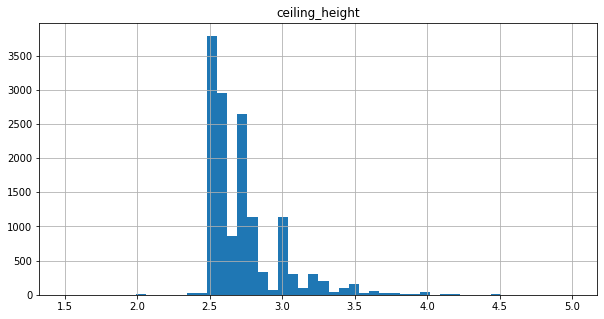

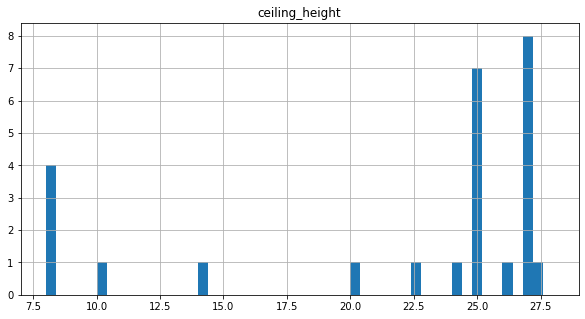

In [19]:
data.hist('ceiling_height', bins=50, range=(1.5, 5), figsize=(10, 5))
data.hist('ceiling_height', bins=50, range=(8, 28), figsize=(10, 5))
print('Среднее значение:', round(data['ceiling_height'].mean(), 1), ',', 'Медиана:', data['ceiling_height'].median())

**Потолки высотой 20 метров и более? Скорее всего кто-то не поставил запятую. Объяснить высоту потолков в 8 - 14 метров кроме как ошибкой не могу. Исправим ошибки:**

Среднее значение: 2.7 , Медиана: 2.65


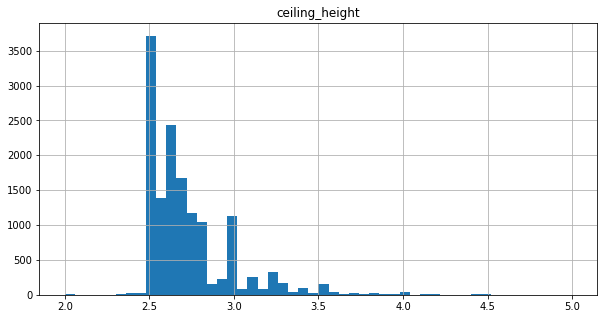

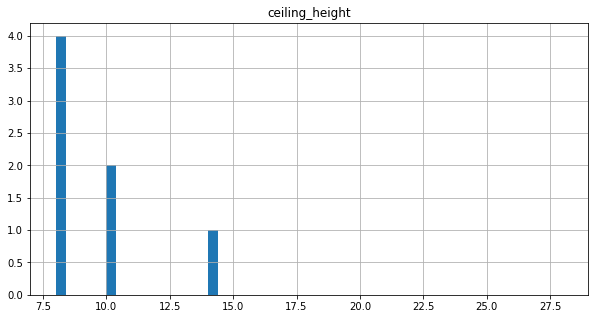

In [20]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height'] / 10)
data.hist('ceiling_height', bins=50, range=(2, 5), figsize=(10, 5))
data.hist('ceiling_height', bins=50, range=(8, 28), figsize=(10, 5))
print('Среднее значение:', round(data['ceiling_height'].mean(), 1), ',', 'Медиана:', data['ceiling_height'].median())

**Выбивающиеся значения позже удалим.**

<AxesSubplot:>

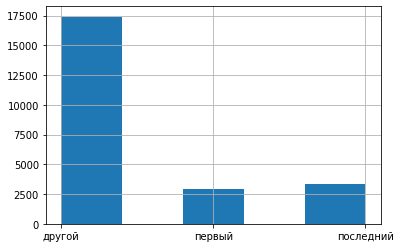

In [21]:
data['type_floor'].hist(bins=5)

**Промежуточные этажи в объявлениях встречаются гораздо чаще, что и следовало ожидать.**

Среднее значение: 10.7 , Медиана: 9.0


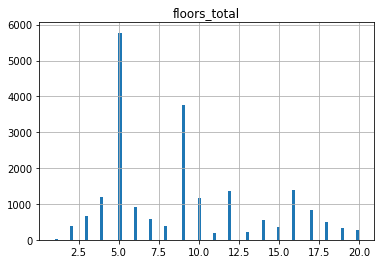

In [22]:
data.hist('floors_total', bins=100, range=(1, 20))
print('Среднее значение:', round(data['floors_total'].mean(), 1), ',', 'Медиана:', data['floors_total'].median())

**Судя по графику, преобладают 5-ти и 9-ти этажные дома. Вопрос в том, где одноэтажные дома? Возможно, те самые пропуски в столбце и есть одноэтажные дома?**

Среднее значение: 14197.9 , Медиана: 13105.0


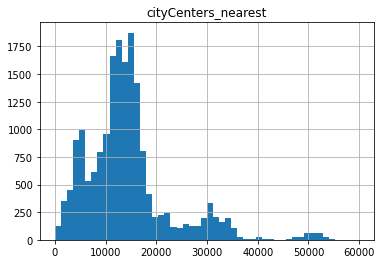

In [23]:
data.hist('cityCenters_nearest', bins=50, range=(0, 60000))
print('Среднее значение:', round(data['cityCenters_nearest'].mean(), 1), ',', 'Медиана:', data['cityCenters_nearest'].median())

**В городе плотность застройки в разы выше, чем в пригородных поселках и деревнях, соответственно и объявлений в городе будет в разы больше, что и показывает график.**

Среднее значение: 490.8307291666667 , Медиана: 454.5


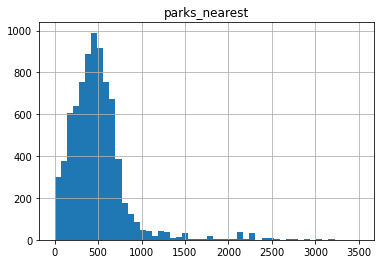

In [24]:
data.hist('parks_nearest', bins=50, range=(0, 3500))
print('Среднее значение:', data['parks_nearest'].mean(), ',', 'Медиана:', data['parks_nearest'].median())

**В основном парки находятся в шаговой доступности. Крайне редко расстояние до парка превышает 1 км. В среднем парки располагаются в полукилометре от жилья. График имеет форму распределения Пуассона.**

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

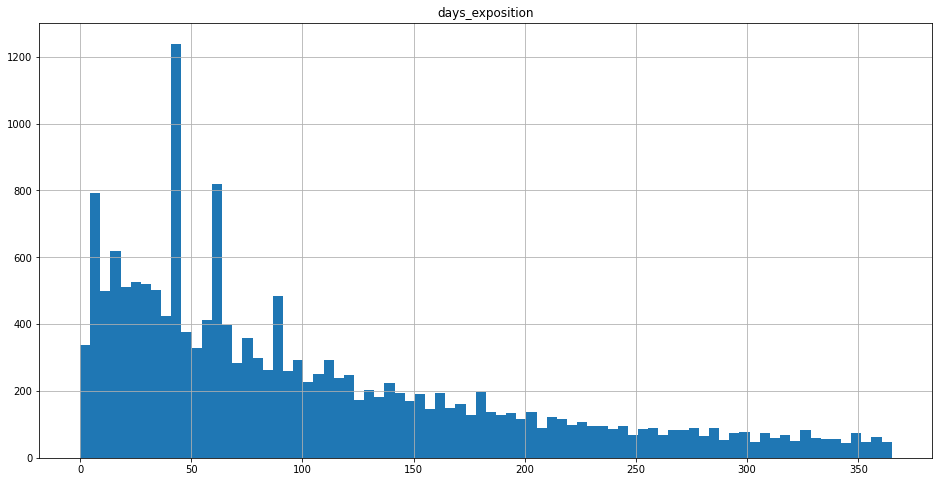

In [25]:
data.hist('days_exposition', bins=80, range=(0, 365), figsize=(16, 8))
data['days_exposition'].describe()

**График подсказывает, что в основном квартиры продавались в первые 3 месяца после подачи объявления. 75% квартир продано в первые 7 месяцев. Быстрыми продажами будем считать продажи до первого квартиля, т.е в первые 44 дня. Это на самом деле быстро. Очень медленные продажи пусть находятся за 3-м квартилем, т.е дольше 218 дней.**

**Удалим выбивающиеся значения. Для этого создадим функцию, которая будет удалять строки, содержащие значения, выпадающие из нормального распределения. Аргументами функции будут, соответственно, наш датафрейм и проверяемый столбец.**

In [26]:
def del_row (df, index):
    q1 = np.quantile(index, .25)
    q3 = np.quantile(index, .75)
    med = np.median(index)
    iqr = q3 - q1
    up_bound = q3 + (1.5 * iqr)
    low_bound = 0
    df.drop(df[index > up_bound].index, inplace=True)
del_row (data, data['total_area'])
del_row (data, data['ceiling_height'])

Средняя общая площадь: 54.3 , Медиана: 50.1
Средняя высота потолков : 2.7 , Медиана: 2.64


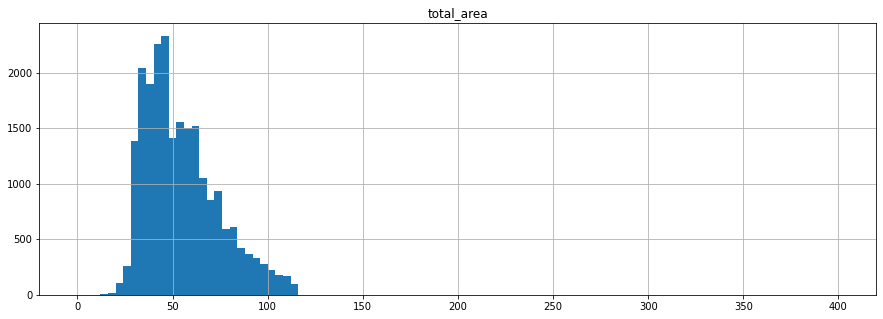

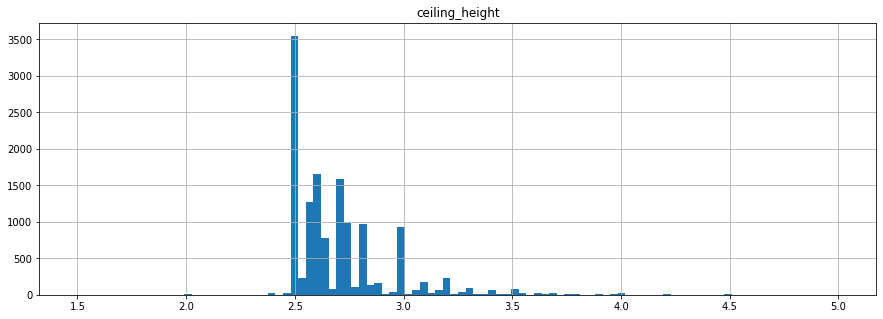

In [27]:
data.hist('total_area', bins=100, grid=True, range=(0, 400), figsize=(15, 5))
print('Средняя общая площадь:', round(data['total_area'].mean(), 1), ',', 'Медиана:', data['total_area'].median())
data.hist('ceiling_height', bins=100, grid=True, range=(1.5, 5), figsize=(15, 5))
print('Средняя высота потолков :', round(data['ceiling_height'].mean(), 1), ',', 'Медиана:', data['ceiling_height'].median())

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22406 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22406 non-null  int64         
 1   last_price            22406 non-null  int64         
 2   total_area            22406 non-null  float64       
 3   first_day_exposition  22406 non-null  datetime64[ns]
 4   rooms                 22406 non-null  int64         
 5   ceiling_height        13637 non-null  float64       
 6   floors_total          22326 non-null  float64       
 7   living_area           20637 non-null  float64       
 8   floor                 22406 non-null  int64         
 9   is_apartment          22406 non-null  bool          
 10  studio                22406 non-null  bool          
 11  open_plan             22406 non-null  bool          
 12  kitchen_area          20250 non-null  float64       
 13  balcony         

**Изначально таблица содержала 23698 строк. После удаления аномалий осталось 22406 строк. Удалено 1292 строки или 5,5% от общей выборки.**

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

0.6815637381737332

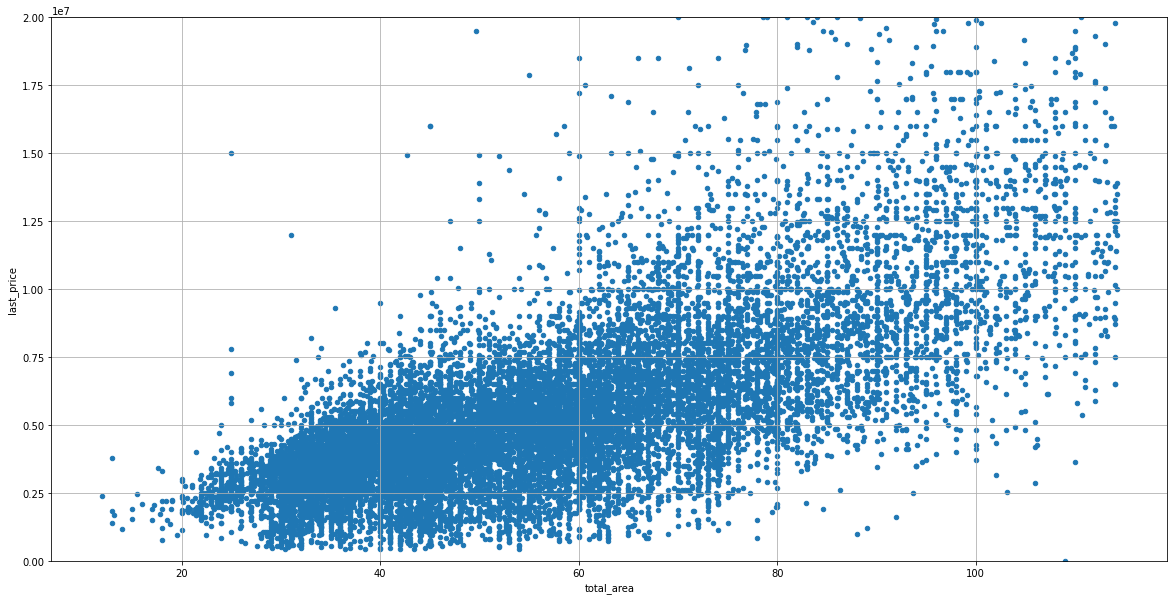

In [29]:
data.plot(x='total_area', y='last_price',grid=True, figsize=(20, 10), kind='scatter', ylim=(0,20000000))
data['total_area'].corr(data['last_price'])

**Чем больше общая площадь, тем выше стоимость. Связь довольно сильная. Это видно на графике и подтверждает коэффициент корреляции Пирсона.**

0.5513411797536188

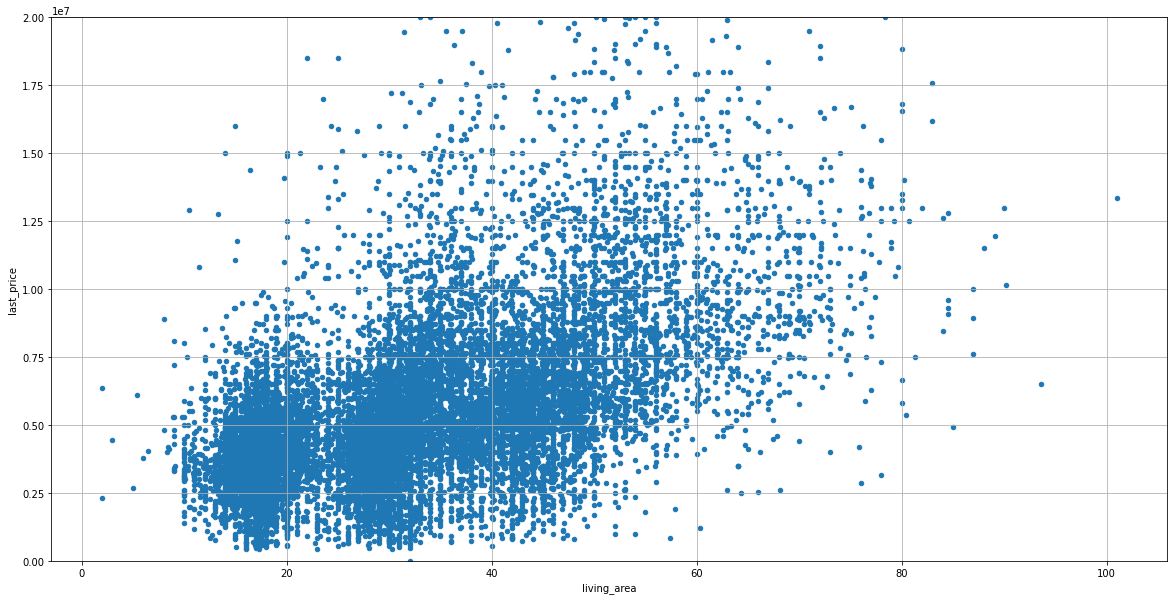

In [30]:
data.plot(x='living_area', y='last_price',grid=True, figsize=(20, 10),kind='scatter', ylim=(0,20000000))
data['living_area'].corr(data['last_price'])

**Чем больше жилая площадь, тем выше стоимость. Связь не очень сильная. Возможно на общую стоимость влияют еще какие-то факторы.**

0.5266329612509039

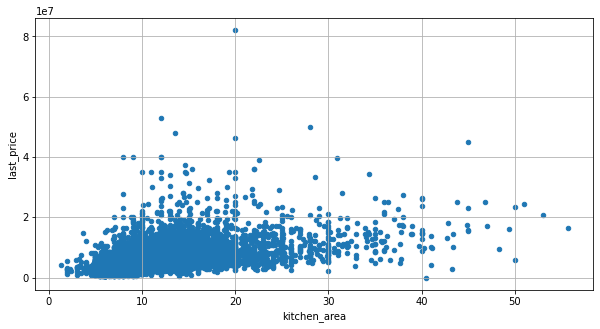

In [31]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5))
data['kitchen_area'].corr(data['last_price'])

**Чем больше кухня, тем выше стоимость. Связь не очень сильная. Возможно на общую стоимость влияют еще какие-то факторы.**

0.384730684158702

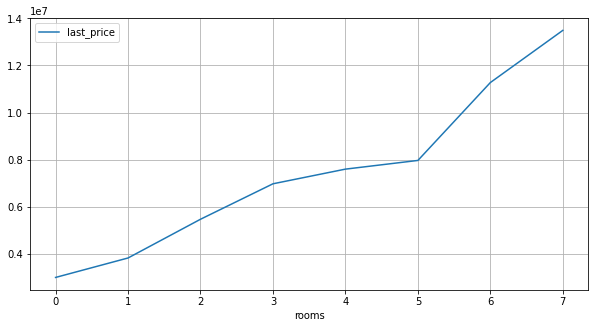

In [32]:
rooms_pivot = data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(10, 5))
data['rooms'].corr(data['last_price'])

**Чем больше комнат, тем больше площадь, тем больше стоимость.**

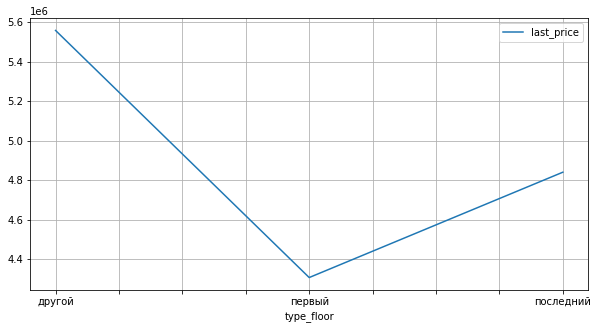

In [33]:
type_floor_pivot = data.pivot_table(index='type_floor', values='last_price').plot(grid=True, figsize=(10, 5))

**Промежуточные этажи дороже, чем первые и последние этажи. Первые этажи самые дешевые.**

-0.015635167165403342

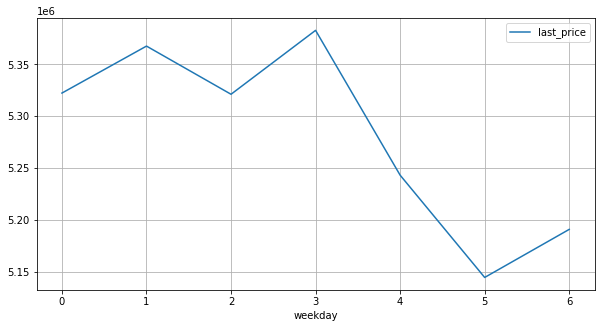

In [34]:
weekday_pivot = data.pivot_table(index='weekday', values='last_price').plot(grid=True, figsize=(10, 5))
data['weekday'].corr(data['last_price'])

**У объявлений выставленных в будние дни цена жилья выше, чем у тех, кто выставлял в выходные. Как таковой связи между данной парой нет**

-0.00016098154012680942

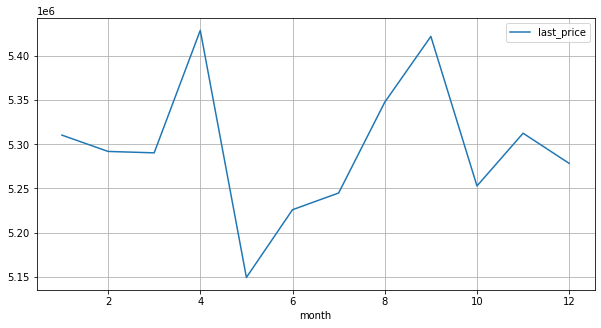

In [35]:
month_pivot = data.pivot_table(index='month', values='last_price').plot(grid=True, figsize=(10, 5))
data['month'].corr(data['last_price'])

**Самое дорогое жилье выставлялось в апреле и сентябре. В мае - самые дешевые. Связь так же отсутствует.**

-0.010425040084547338

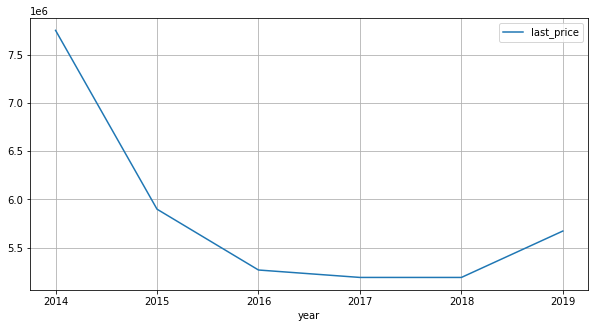

In [36]:
year_pivot = data.pivot_table(index='year', values='last_price').plot(grid=True, figsize=(10, 5))
data['year'].corr(data['last_price'])

**С 2014 по 2016 год идет резкое снижение стоимости жилья. В 2016-2018 цены остаются примерно на одном уровне. Начиная с 2018 наблюдается рост цен. Связи так же нет.**

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [37]:
top_locality = (
    data
    .pivot_table(index='locality_name', values='price_one_meter', aggfunc={'count', 'mean'})
    .sort_values(by='count', ascending=False)
    .head(10)
)
top_locality.columns = ['total_ad', 'mean_price']
top_locality = top_locality.sort_values(by='mean_price', ascending=False)
print(top_locality)

                   total_ad     mean_price
locality_name                             
Санкт-Петербург       14574  110727.898342
Пушкин                  347  101960.374986
деревня Кудрово         298   92409.726309
поселок Парголово       326   90332.262638
поселок Мурино          556   85681.762572
поселок Шушары          437   78704.891945
Колпино                 336   75370.025476
Гатчина                 304   68919.469013
Всеволожск              395   68673.570481
Выборг                  228   58225.624561


**В среднем, самый дорогой квадратный метр в Санкт-Петербурге, а самый дешевый - в Выборге.**

**Вычислим среднюю цену каждого километра.**

<AxesSubplot:xlabel='distance_to_center'>

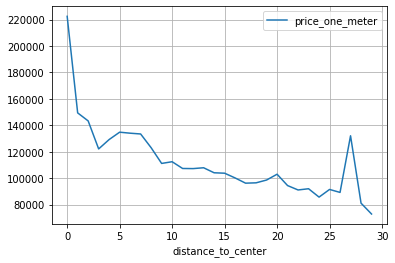

In [38]:
data['distance_to_center'] = data['distance_to_center'].fillna(-1)
data['distance_to_center'] = data['distance_to_center'].astype('int')
spb_locality_pivot = (
    data
    .query('locality_name == "Санкт-Петербург" and distance_to_center >= 0')
    .pivot_table(index='distance_to_center', values='price_one_meter')
)
spb_locality_pivot.plot(grid=True)

**Чем дальше от центра, тем дешевле квадратный метр. Однако, в 27 км от центра резкий рост цены за метр. Элитный район?**

**Вывод по 4 части: Был проведен исследовательский анализ данных. Установлено, что на стоимость жилья больше всего влияет общая площадь помещения, в меньшей степени жилая площадь и площадь кухни. Также на стоимость влияет расстояние от центра города.**

### Общий вывод

1. Был загружен предлагаемый датасет, проведена первичная оценка данных:
   1. Посмотрели несколько строк для общего понимания;
   2. Просмотрена информация об этом датасете;
   3. Построены гистограммы по каждому столбцу.
2. Проведена предобработка данных:
  1. Обработаны пропущенные значения в столбцах `balcony` и `is_apartment`;
  2. Заменены типы данных на необходимые для удобной работы;
  3. Стоит отметить, что в приложенном датасете остались пропуски, сделанные человеком (`ceiling_height`, `floors_total`, `living_area`, `kitchen_area`) и программные пропуски, появившиеся, скорее всего, из-за сбоя в программе (`airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`). Таких пропусков в столбцах от 5000 до 15000. Удалить их нельзя, т.к они исказят статистику.
3. Расчитаны и добавлены в таблицу: цена одного квадратного метра жилья, дни недели, месяцы и года размещения объявлений, добавлены категории этажей квартир.
4. Изучены параметры, которые могут повлиять на стоимость жилья, построены гистограммы, расчитаны коэффициенты корреляции. Было установлено, что на стоимость квадратного метра квартиры больше всего влияют Общая площадь, жилая площадь и расстояние до центра. Незначительно на стоимость квадратного метра влияют площадь кухни и этаж квартиры.
5. Было установлено, что на стоимость квадратного метра квартиры больше всего влияют Общая площадь, жилая площадь и расстояние до центра. Незначительно на стоимость квадратного метра влияют площадь кухни и этаж квартиры. Именно на эти параметры стоит обращать внимание при определении рыночной стоимости объектов недвижимости.